# **Softmax Regression**

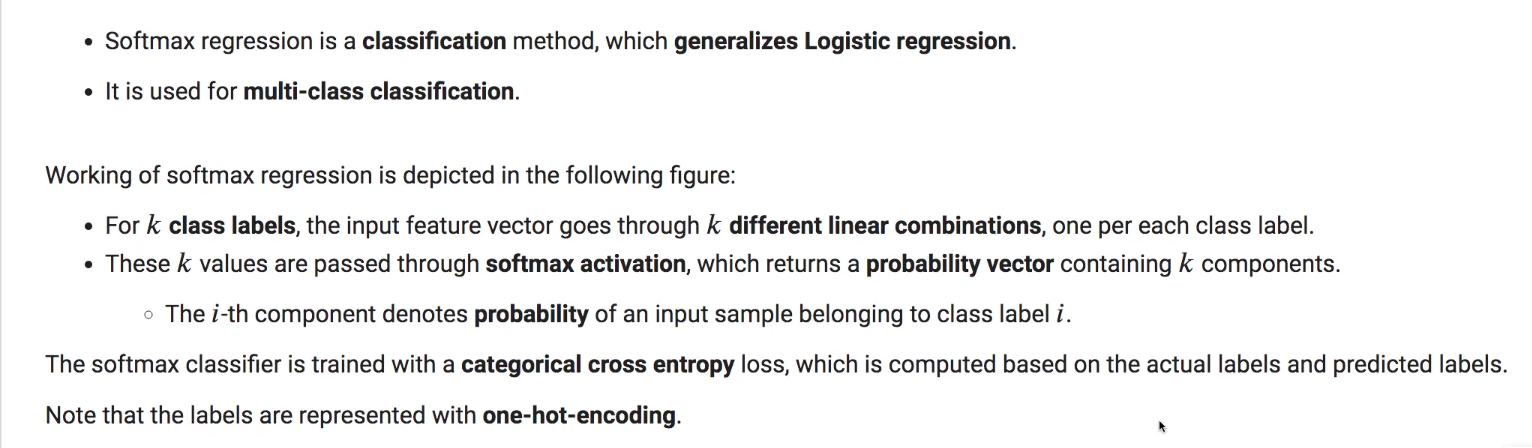

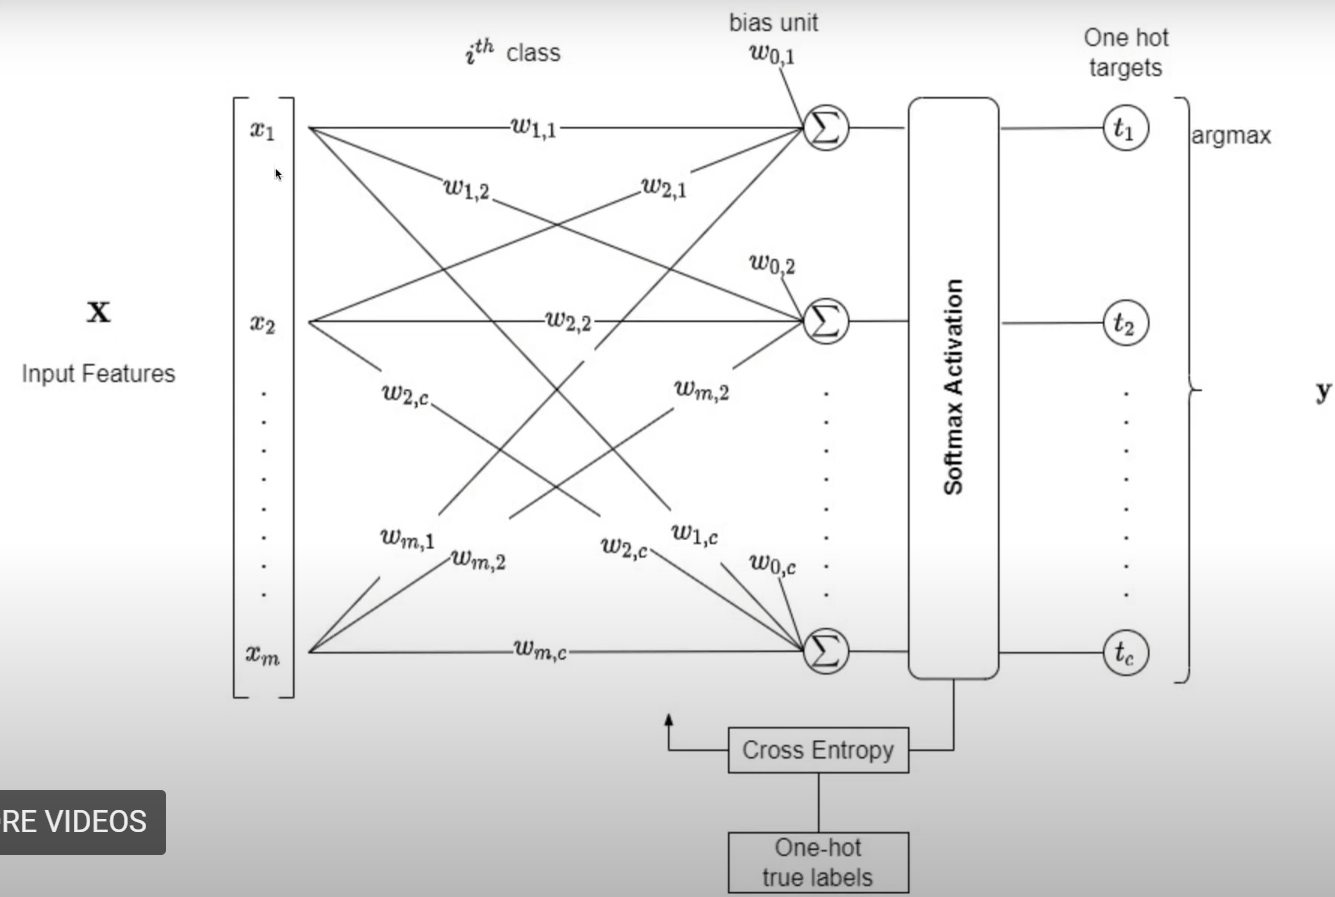

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

## **Training Data**

In [2]:
(train_X,train_y),(test_X,test_y)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


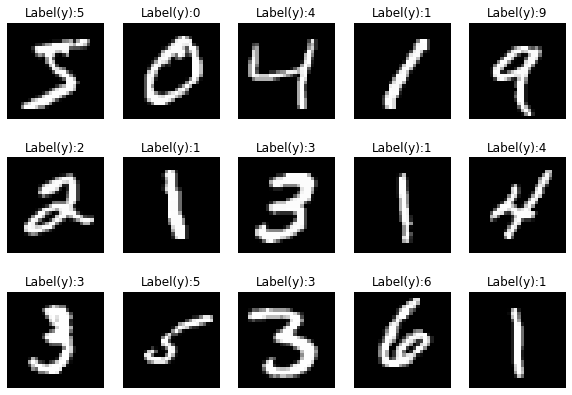

In [3]:
fig=plt.figure(figsize=(10,7))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1)
  ax.imshow(train_X[i],cmap=plt.get_cmap('gray'))
  ax.set_title('Label(y):{y}'.format(y=train_y[i]))
  plt.axis('off')


In [4]:
X_train=train_X.reshape(train_X.shape[0],28*28)
X_test=test_X.reshape(test_X.shape[0],28*28)

X_train=X_train/255
X_test=X_test/255

In [5]:
def convert_to_one_hot_encoding(y,k):
  y_one_hot=np.zeros((len(y),k))

  y_one_hot[np.arange(len(y)),y]=1
  return y_one_hot

## **Model**

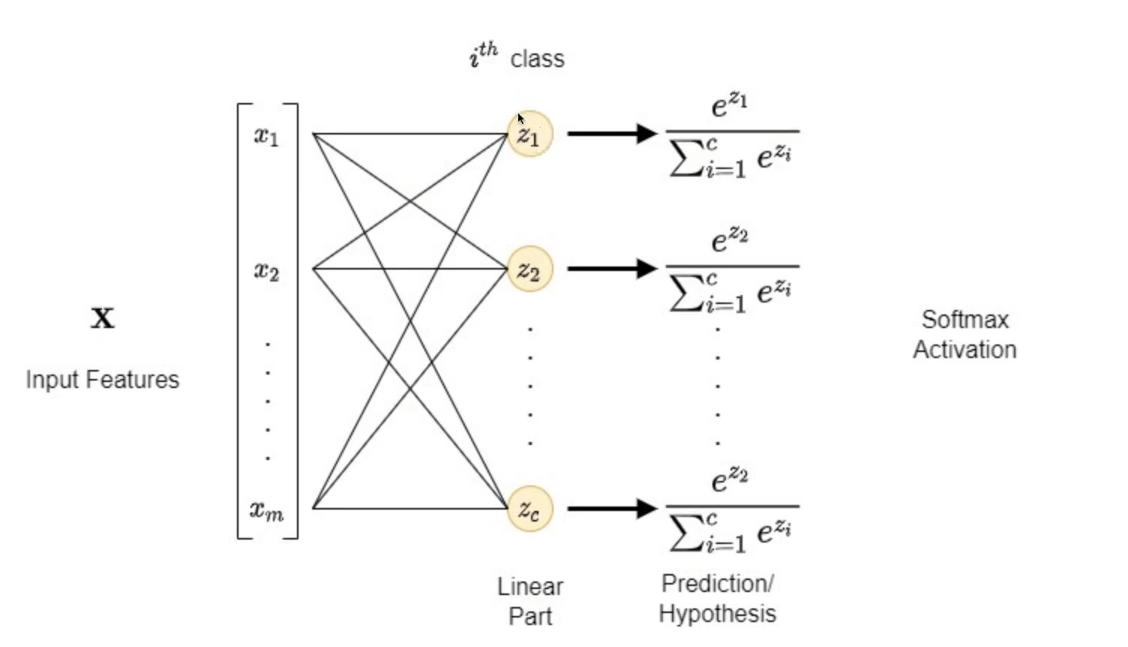

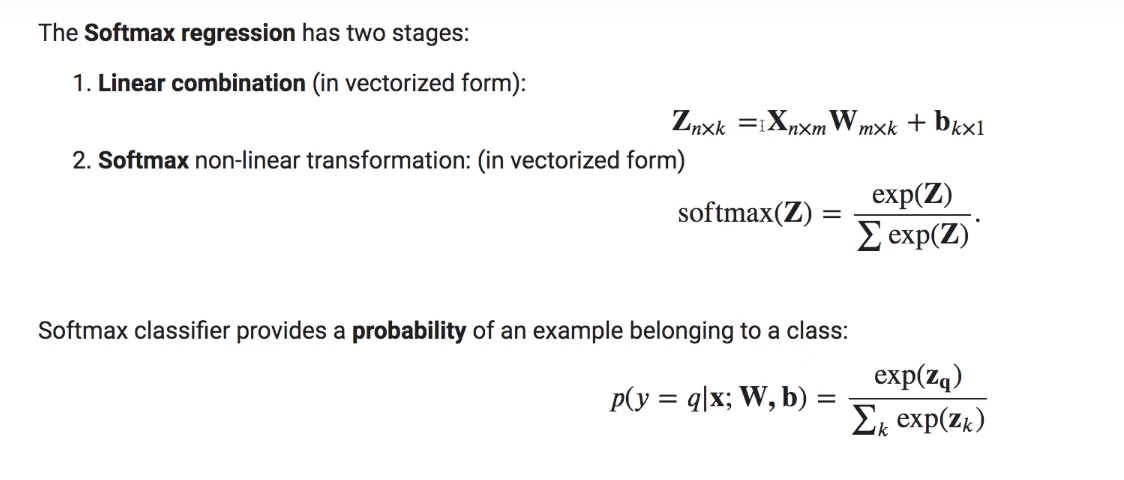

## **Softmax regression implementation**

In [6]:
def linear_combination(X,w,b):
  return X@w+b

In [7]:
def softmax(z):
  exp=np.exp(z-np.max(z))

  for i in range(len(z)):
    exp[i] /=np.sum(exp[i])

  return exp

## **Categorical cross entropy loss function**

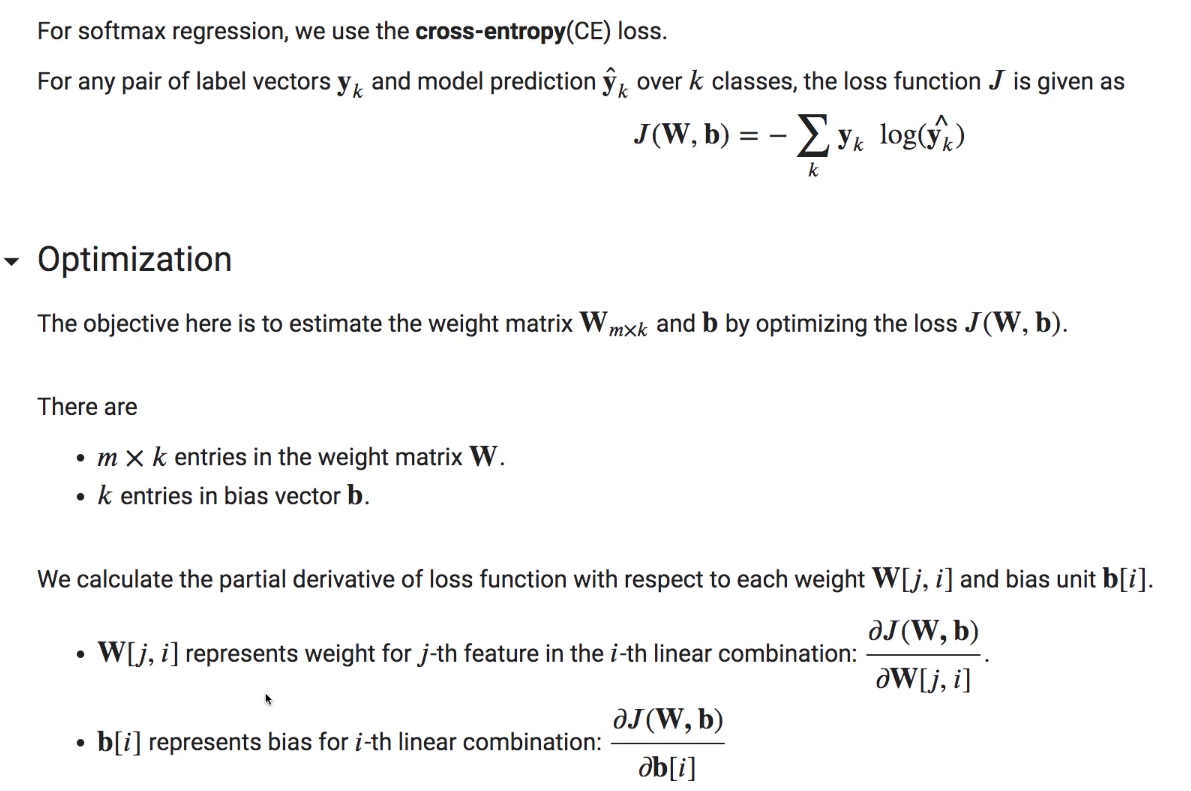

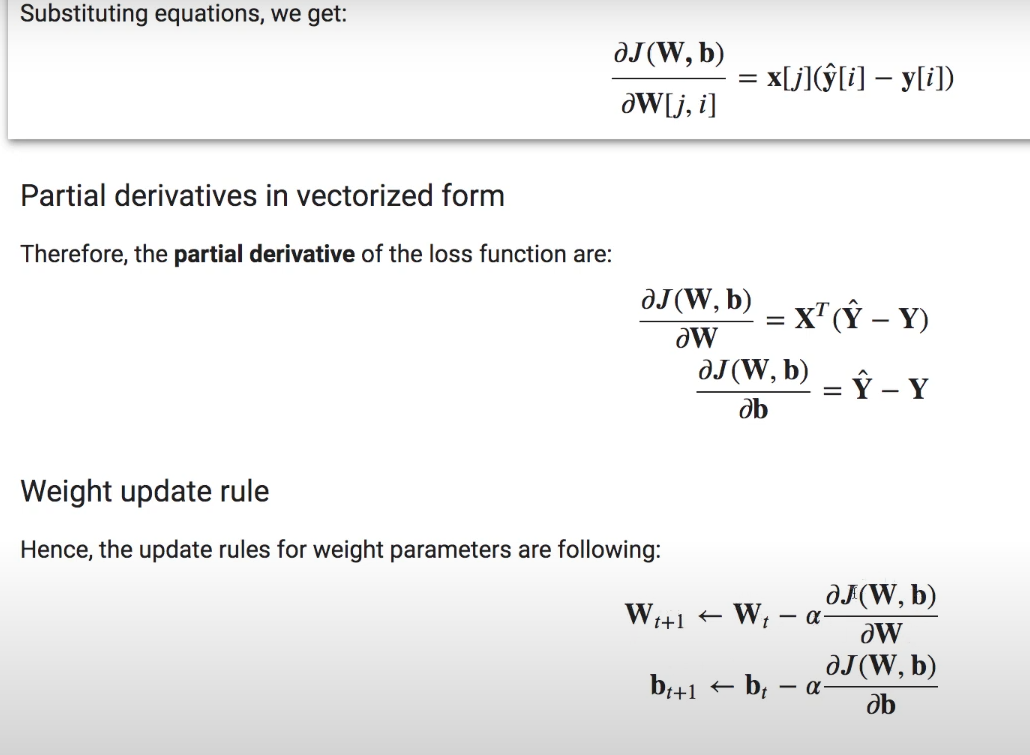

## Training

In [8]:
def fit(X,y,lr,c,epochs):
  n,m=X.shape

  w=np.random.random((m,c))
  b=np.random.random(c)

  losses=[]

  for epoch in range(epochs):
    z=X@w+b
    y_hat=softmax(z)

    y_hot=convert_to_one_hot_encoding(y,c)

    w_grad=(1/n)*np.dot(X.T,(y_hat-y_hot))
    b_grad=(1/n)*np.sum(y_hat-y_hot)

    w=w-lr*w_grad
    b=b-lr*b_grad

    loss=-np.mean(np.log(y_hat[np.arange(len(y)),y]))
    losses.append(loss)

    if epoch%10==0:
      print('Epochs {epoch}==>Loss={loss}'.format(epoch=epoch,loss=loss))
  return w,b,losses

In [9]:
def predict(X,w,b):
  z=X@w+b
  y_hat=softmax(z)

  return np.argmax(y_hat,axis=1)
def accuracy(y,y_hat):
  return np.sum(y==y_hat)/len(y)

## **Training digit recognizer on mnist data**

In [10]:
w,b,l=fit(X_train, train_y,lr=0.9,c=10,epochs=100)

Epochs 0==>Loss=5.2433130911484955
Epochs 10==>Loss=1.0431803510912798
Epochs 20==>Loss=0.6774580761205858
Epochs 30==>Loss=0.5769655387357485
Epochs 40==>Loss=0.5266497102413439
Epochs 50==>Loss=0.49399741296895094
Epochs 60==>Loss=0.4705412687977206
Epochs 70==>Loss=0.45267354088190553
Epochs 80==>Loss=0.4384820707800598
Epochs 90==>Loss=0.426852823518076


## **Learning curve**

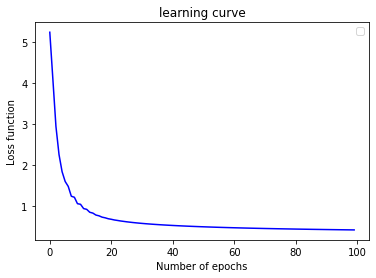

In [11]:
plt.figure()
plt.title('learning curve')
plt.legend(['Training Loss'])
plt.xlabel('Number of epochs')
plt.ylabel('Loss function')
plt.plot(np.arange(len(l)),l,'b-')
plt.show()

In [12]:
test_preds=predict(X_test,w,b)
print('Accuracy for test set: ',accuracy(test_y,test_preds))

Accuracy for test set:  0.8844


## **Confusion Matrix**

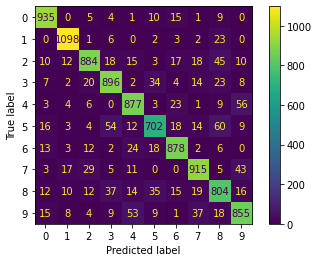

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(test_y,test_preds)
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_y,test_preds))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.86      0.88      1032
           3       0.87      0.89      0.88      1010
           4       0.87      0.89      0.88       982
           5       0.86      0.79      0.82       892
           6       0.90      0.92      0.91       958
           7       0.89      0.89      0.89      1028
           8       0.80      0.83      0.81       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('F1 score: ', f1_score(test_y, test_preds,average='micro'))
print('Precision: ', precision_score(test_y,test_preds,average='micro'))
print('Recall: ', recall_score(test_y,test_preds,average='micro'))

F1 score:  0.8844
Precision:  0.8844
Recall:  0.8844


In [16]:
print('F1 score: ', f1_score(test_y, test_preds,average='macro'))
print('Precision: ', precision_score(test_y,test_preds,average='macro'))
print('Recall: ', recall_score(test_y,test_preds,average='macro'))

F1 score:  0.8824306045073567
Precision:  0.8830271563510136
Recall:  0.8824677409686252


## **Plotting Predictions**

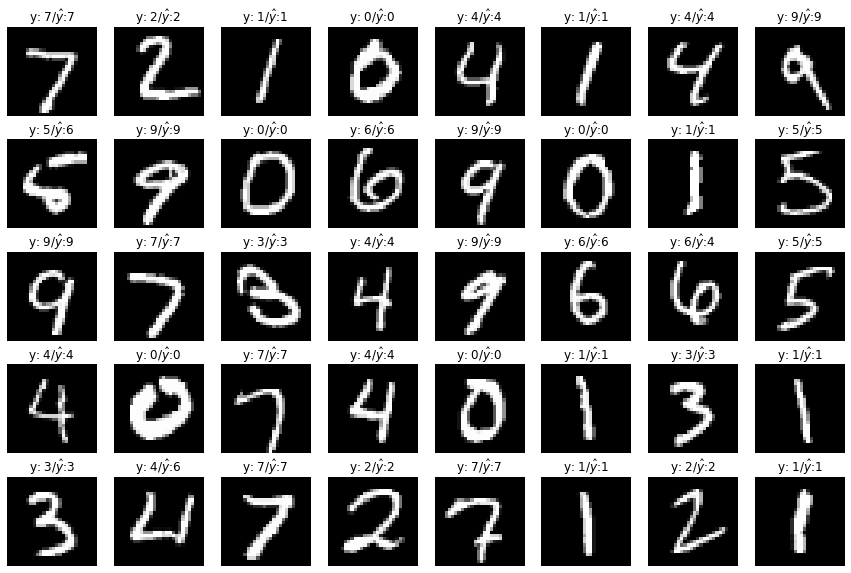

In [17]:
fig=plt.figure(figsize=(15,10))
for i in range(40):
  ax=fig.add_subplot(5,8,i+1)
  ax.imshow(test_X[i],cmap=plt.get_cmap('gray'))
  ax.set_title(f'y: ${test_y[i]}$/'+'$\hat{y}$:'+f'{test_preds[i]}')
  plt.axis('off')

# **K Nearest Neighbours**

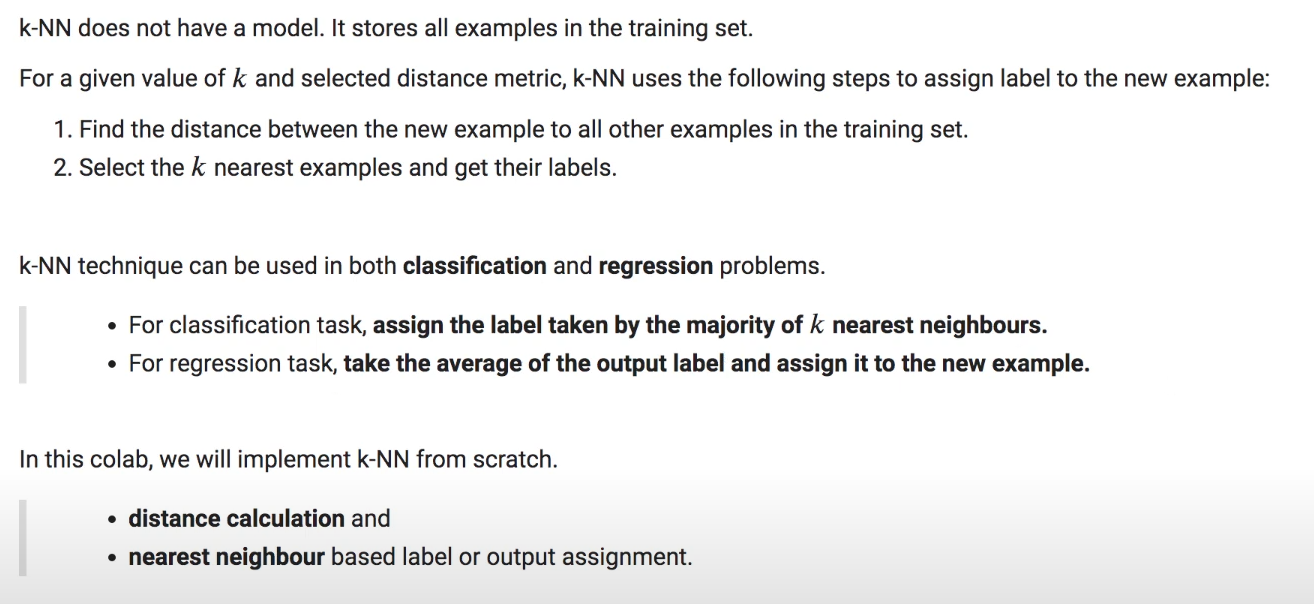

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')

from scipy import stats
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split

## **Distance computation**

In [19]:
def EuclideanDistance(x1,x2):
  dist=np.sum((x1-x2)**2,axis=1)
  return dist 

def ManhattanDistance(x1,x2):
  dist=np.sum((x1-x2),axis=1)
  return dist

## **KNN Implementation**

In [20]:
class KNN:
  def __init__(self,k,distance_metric=EuclideanDistance,
               task_type='Classification'):
    self._k=k
    self._distance_metric=distance_metric
    self._task_type=task_type

  def fit(self, X,y):
    self._X=X
    self._y=y
  def predict(self, newExample):
    distance_vector=self._distance_metric(self._X, newExample)

    k_nearest_neighbours_indices=np.argpartition(distance_vector,self._k)[:self._k]

    k_nearest_neighbours=self._y[k_nearest_neighbours_indices]

    if self._task_type=='Classification':
      label=stats.mode(k_nearest_neighbours)[0]

    else:
      label=k_nearest_neighbours.mean()

    return label, k_nearest_neighbours_indices
  
  def eval(self, X_test, y_test):
    if self._task_type=='Classification':
      y_predicted=np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_=self.predict(X_test[i,:])
      error=np.mean(y_test==y_predicted,axis=0)
    else:
      y_predicted=np.zeros(y_test.shape)
      for i in range(y_test.shape[0]):
        y_predicted[i],_=self.predicted(X_test[i,:])
      error_vector=y_predicted-y_test
      error=np.sqrt((error_vector.T @ error_vector)/error_vector.ravel().shape[0])
    return error

## **Classification**

In [21]:
# Simple decision boundary

X,y=make_blobs(n_samples=100,
               n_features=2,
               centers=[[0,0],[5,5]],
               cluster_std=1,
               random_state=12)

In [22]:
X.shape

(100, 2)

In [24]:
y.shape

(100,)

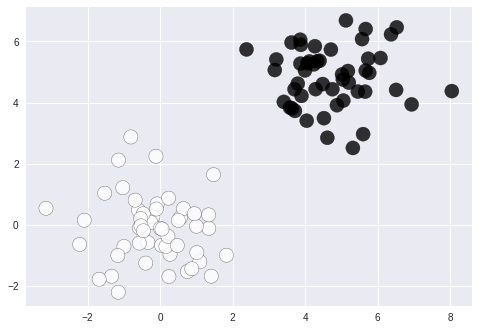

In [25]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,
            s=200,edgecolor='k',alpha=0.8)
plt.show()

In [26]:
newExample=np.array([2.2,2.2])

model=KNN(3,distance_metric=EuclideanDistance)
model.fit(X,y)
predictions,nearest_neighbours_indices=model.predict(newExample.reshape(1,2))

In [27]:
predictions

array([0])

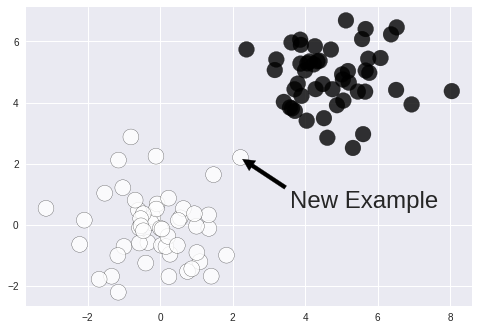

In [28]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,
            s=250,edgecolor='k',alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',c='white',
            s=250,edgecolor='k',alpha=0.8)
plt.annotate('New Example',xy=newExample,
             xytext=(50,-50),textcoords='offset points',
             arrowprops=dict(facecolor='black',shrink=0.05),fontsize=24)
plt.show()

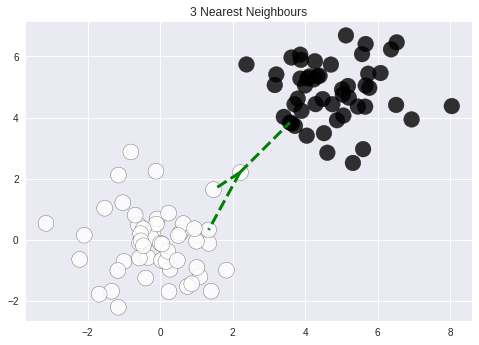

In [30]:
plt.figure()
plt.grid(True)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,
            s=250,edgecolor='k',alpha=0.8)
plt.scatter(newExample[0],newExample[1],marker='o',c='white',
            s=250,edgecolor='k',alpha=0.8)
for xi in X[nearest_neighbours_indices]:
  plt.plot([newExample[0], xi[0]],[newExample[1],xi[1]],'g--',linewidth=3)

plt.title('3 Nearest Neighbours')
plt.show()

In [33]:
def draw_decision_boundary(model,axis_chart,num_points=201,opacity=0.05):
  tx=np.linspace(np.min(model._X[:,0],axis=0)-2,
                 np.max(model._X[:,0],axis=0)+2, num_points)
  
  ty=np.linspace(np.min(model._X[:,1],axis=0)-2,
                 np.max(model._X[:,1],axis=0)+2, num_points)
  
  xx,yy=np.meshgrid(tx,ty)
  grid_prediction=np.zeros(xx.shape)

  for i in range(num_points):
    for j in range(num_points):
      grid_prediction[i][j],_=model.predict([xx[i][j],yy[i][j]])

  axis_chart.scatter(xx.ravel(),yy.ravel(),
                     c=grid_prediction.ravel(),alpha=opacity)
  

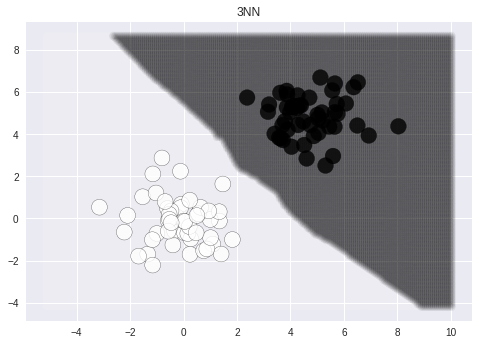

In [34]:
plt.figure()
current_axis=plt.gca()
plt.grid(True)

draw_decision_boundary(model,current_axis)

plt.scatter(X[:,0],X[:,1],marker='o',c=y,
            s=250,edgecolor='k',alpha=0.8)
plt.title('3NN')
plt.show()

 **Complex Decision Boundary**

In [38]:
def maketwospirals(num_points=100,rotations=2,noise=5):

  n = np.sqrt(np.random.rand(num_points,1)) * rotations * (2*np.pi)
  rx= -np.cos(n)*n + np.random.rand(num_points,1) * noise
  ry=  np.sin(n)*n + np.random.rand(num_points,1) * noise

  return (np.concatenate((np.hstack((rx,ry)),
                          np.hstack((-rx,-ry))),
                         axis=0),
          np.concatenate((np.zeros(num_points),
                          np.ones(num_points)),
                         axis=0))
  
X_spiral, y_spiral=maketwospirals()

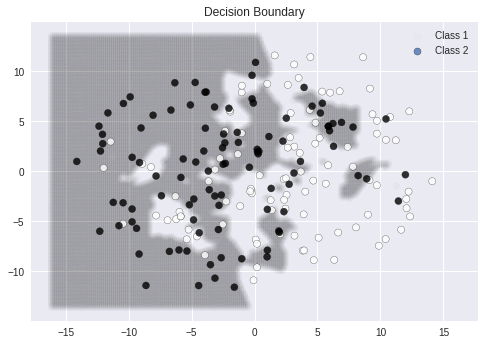

In [39]:
plt.figure()
model=KNN(3)
model.fit(X_spiral,y_spiral)
draw_decision_boundary(model, plt.gca(),opacity=0.02)

plt.scatter(X_spiral[:,0],X_spiral[:,1],marker='o',c=y_spiral,
            s=50,edgecolor='k',alpha=0.8)
plt.title('Decision Boundary')
plt.legend(['Class 1','Class 2'])
plt.show()

## **Regression**

In [40]:
np.random.seed(42)

w1=3
w0=4
n=100

X=2* np.random.rand(n,)
y=w0+w1*X+np.random.rand(n,)

In [41]:
X=X.reshape(-1,1)
y=y.reshape(-1,1)

In [42]:
X.shape

(100, 1)

In [43]:
y.shape

(100, 1)

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
X_train.shape

(80, 1)

In [46]:
y_train.shape

(80, 1)

In [47]:
X_test.shape

(20, 1)

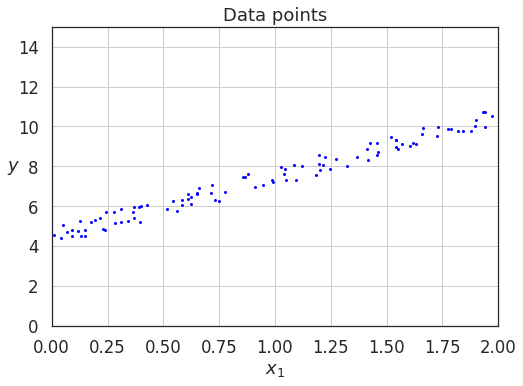

In [48]:
sns.set_style('white')
f=plt.figure()
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

plt.plot(X,y,'b.')
plt.title('Data points')
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.show()

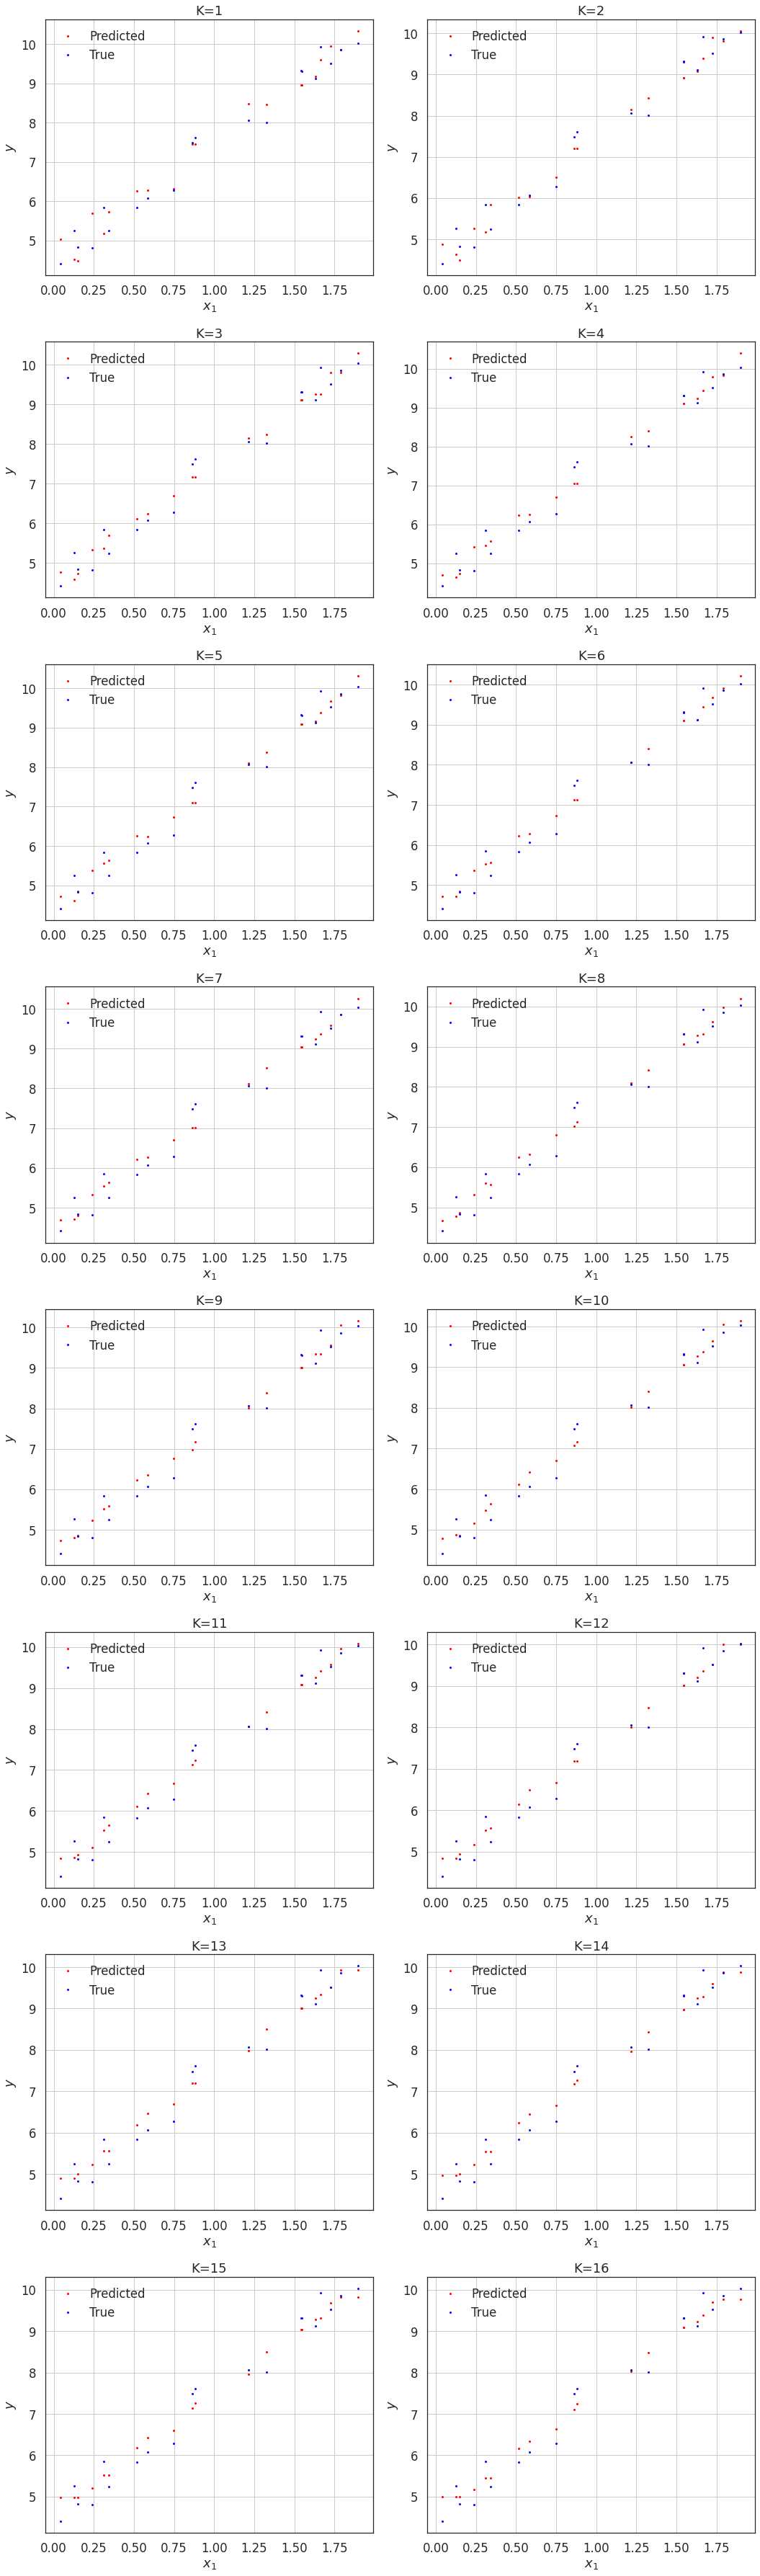

In [51]:
figure, axis=plt.subplots(8,2,figsize=(15,50))
axis=axis.ravel()

error_list=[]
for i in range(16):
  model=KNN(i+1,task_type='Regression')

  model.fit(X_train,y_train)
  y_test_predicted=np.zeros_like(y_test)

  for j in range(X_test.shape[0]):
    y_test_predicted[j],_=model.predict(X_test[j,:])

  error_list.append(np.sum(np.power(y_test-y_test_predicted,2)))

  axis[i].plot(X_test,y_test_predicted,'r.')

  axis[i].plot(X_test,y_test,'b.')
  axis[i].legend(['Predicted','True'])

  axis[i].set_title(f'K={i+1}')

  axis[i].grid(True)
  axis[i].set(xlabel='$x_1$', ylabel='$y$')
figure.tight_layout()
plt.show()

Text(0, 0.5, 'Error')

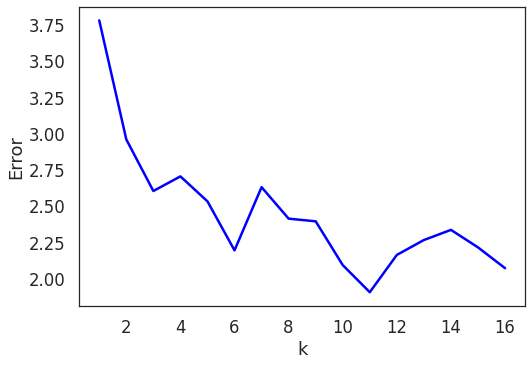

In [54]:
plt.plot(np.arange(len(error_list))+1,error_list,'b-')
plt.xlabel('k')
plt.ylabel('Error')

# **Practice Assignments**

In [86]:
from sklearn import preprocessing
def convert_to_one_hot_encoding(y,k=1):
  le = preprocessing.LabelEncoder()
  le.fit(y)
  data=le.transform(y)
  # data = y
  shape = (len(data), data.max()+1)
  one_hot = np.zeros(shape)
  rows = np.arange(data.size)
  one_hot[rows, data] = 1
  return one_hot


In [87]:
convert_to_one_hot_encoding(np.array([8, 6, 3]))

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [126]:
p=np.array([3,45,96,56,-3.9])
def EuclideanDistance(x1,x2):
  dist=np.sum((x1-x2)**2,axis=0)
  return dist 

In [119]:
EuclideanDistance(p,np.array([33,-102,7,0.7,-10]))

15165.3

In [120]:
np.sqrt(15165.3)

123.1474725684616

In [125]:
ManhattanDistance(p,np.array([33,-102,7,0.7,-10])

array([-30. ,  57. ,  89. ,  55.3,   6.1])

In [115]:
EuclideanDistance(p,np.array([-5,5]))


50

In [116]:
EuclideanDistance(p,np.array([-1,22]))

565

In [117]:
EuclideanDistance(p,np.array([-7,1]))

10

In [129]:
softmax(np.array([1,2,-1,3]))

array([1., 1., 1., 1.])

In [4]:
from scipy.special import softmax
import numpy as np
x=np.array([[1],[2],[-1],[3]])
m=softmax(x)

In [6]:
m.round(2)

array([[0.09],
       [0.24],
       [0.01],
       [0.66]])

In [7]:
v = np.array([2.1, 4.8, 3.5] )
softmax(v)

array([0.0501632 , 0.74641498, 0.20342181])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
